In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
from src.utils import *

2025-05-31 19:43:00,876 - INFO - ================================================================================


In [2]:
def plot_conditions(subject: dict, title: str, output_path: str = None):
    # onsets = np.sort(subject["onsets"].flatten())
    labels = subject["labels"].flatten()
    volume = subject["volume"].flatten()
    fussy = subject["fussy"].flatten()
    sleep = subject["sleep"].flatten()
    # times = onsets - onsets[0]
    times = np.arange(len(labels)) * 300
    plt.figure(figsize=(12, 4))
    # plt.plot(times, labels / 8, label="labels")
    plt.plot(times, sleep, label="sleep")
    plt.plot(times, fussy, label="fussy")
    plt.plot(times, volume, label="volume")
  
    labels = [f"{times[0]}", f"{times[-1]}"]
    ticks = [times[0], times[-1]]
    plt.xticks(ticks=ticks, labels=labels)
  
    plt.title(title)
    plt.ylabel("Value")
    plt.xlabel('Sampled points')
    plt.legend()
    plt.tight_layout()
    if output_path:
        output_path /= "visualization/"
        output_path.mkdir(exist_ok=True, parents=True)
        plt.savefig(output_path / f"{title.lower()}.png",
                    dpi=300, bbox_inches="tight")

    plt.show(block=False)
    plt.pause(0.1)
    plt.close()
  

In [3]:
config = Config(root_dir="../")
eeg = EEG(n_channels=config.N_CHANNELS, sfreq=config.S_FREQ)


In [10]:
# DATA READING
# CLEAN DATA
root = os.path.abspath('./')
basename = "/" + os.path.basename(root) 
config.ROOT_PATH = root
OUTPUT_PATH = Path(str(config.OUTPUT_DIR).replace(basename, ''))
clean_subject_files = eeg.get_subject_files(
        data_path=Path(str(config.CLEAN_SUBJECTS_PATH).replace(basename, '')) / "train", ext=config.FILE_EXT
    )

clean_filename = clean_subject_files[1]

clean_subject = eeg.get_subject(
    filename=clean_filename, time_points=config.TIME_POINTS, sfreq=config.S_FREQ
)

clean_mne_subject = eeg.to_mne(clean_subject.copy())
clean_epochs_subject = eeg.to_epochs(clean_subject.copy())

c_fname = clean_subject['fname']


2025-05-31 19:47:13,446 - INFO - Total files found : 20
2025-05-31 19:47:16,910 - INFO - Subject S23 -> Data shape: (1707, 128, 300)
2025-05-31 19:47:16,962 - INFO - Total recording time: 2048.4 sec (34.14 min)


In [12]:
# RAW DATA
raw_subject_files = eeg.get_subject_files(
    data_path=Path(str(config.RAW_SUBJECTS_PATH).replace(basename, '')), ext=config.FILE_EXT
)

raw_filename = raw_subject_files[0]

raw_subject = eeg.get_subject(
    filename=raw_filename, time_points=config.TIME_POINTS, sfreq=config.S_FREQ
)

raw_mne_subject = eeg.to_mne(raw_subject.copy())
raw_epochs_subject = eeg.to_epochs(raw_subject.copy())

r_fname = raw_subject['fname']


2025-05-31 19:47:40,058 - INFO - Total files found : 1
2025-05-31 19:47:43,895 - INFO - Subject S18 -> Data shape: (2471, 128, 300)
2025-05-31 19:47:43,964 - INFO - Total recording time: 2965.2 sec (49.42 min)


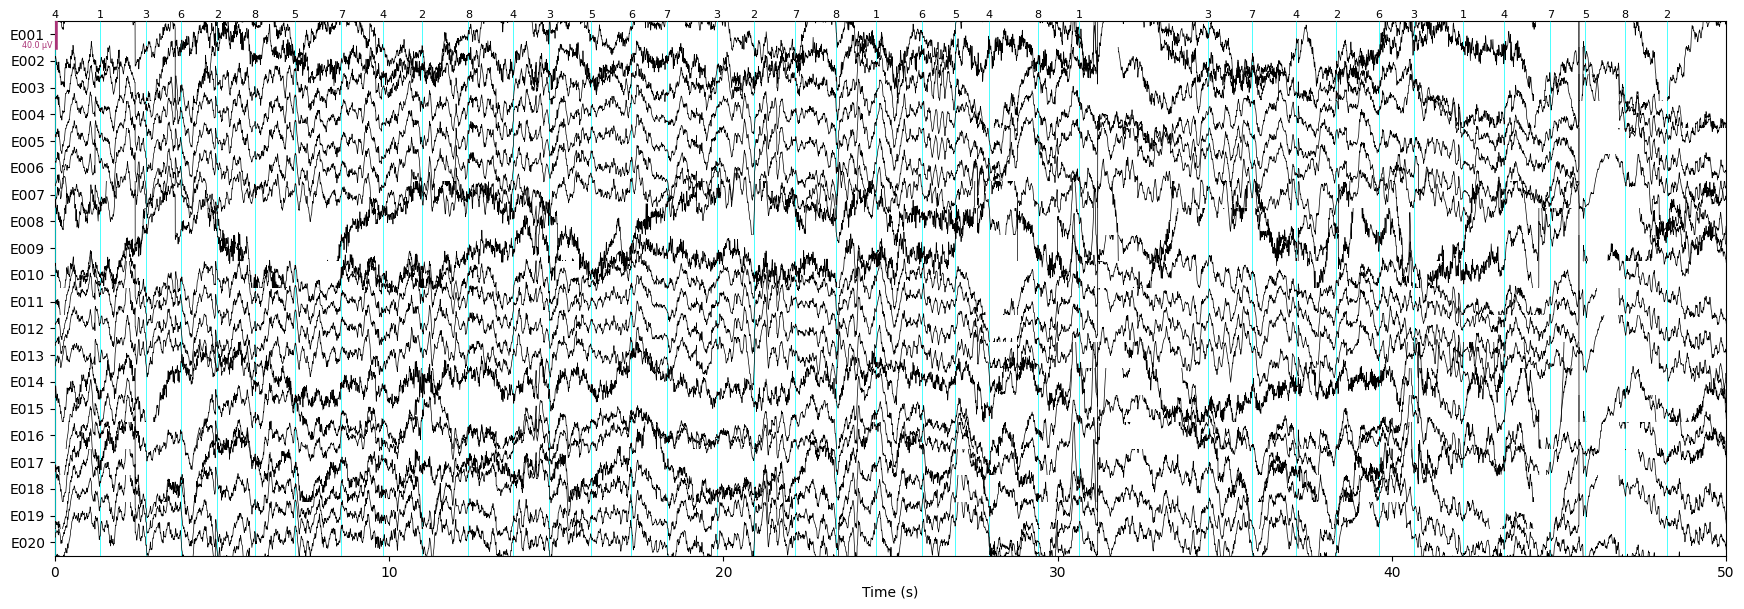

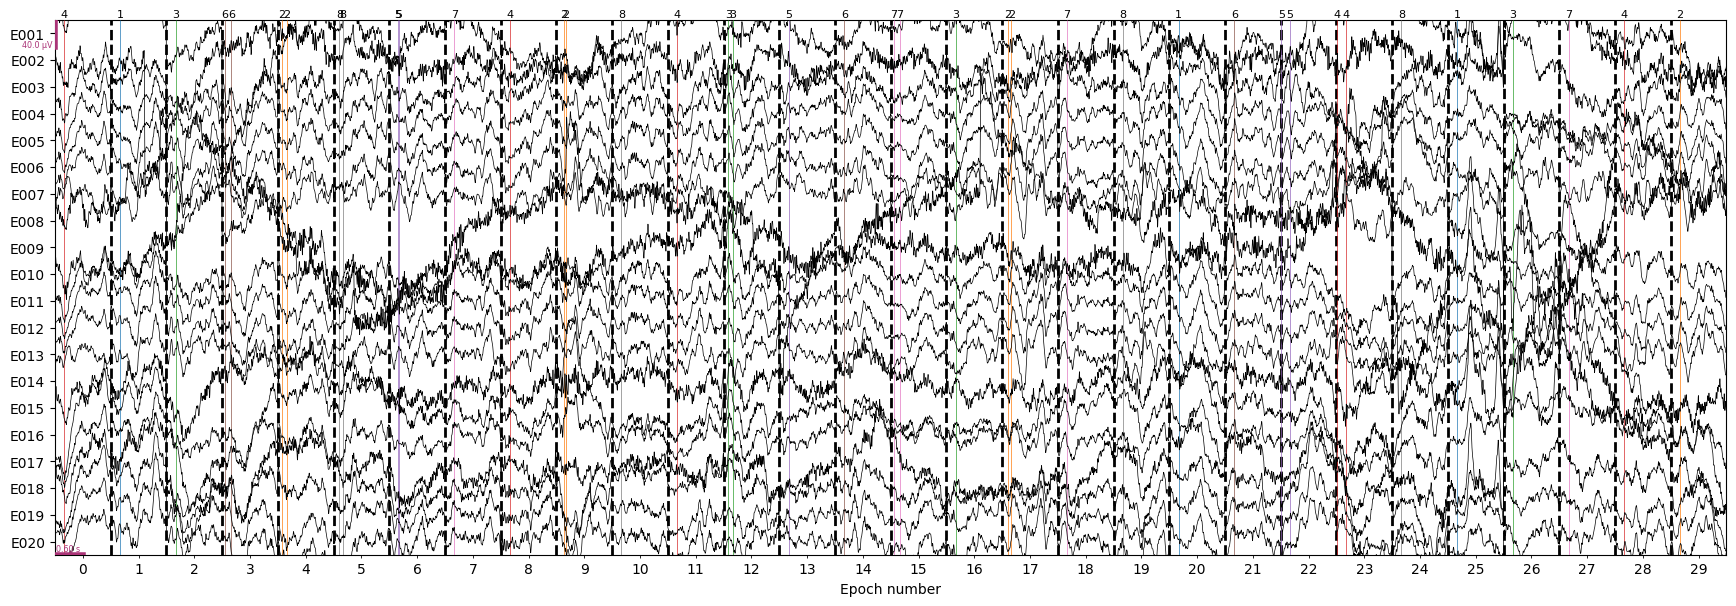

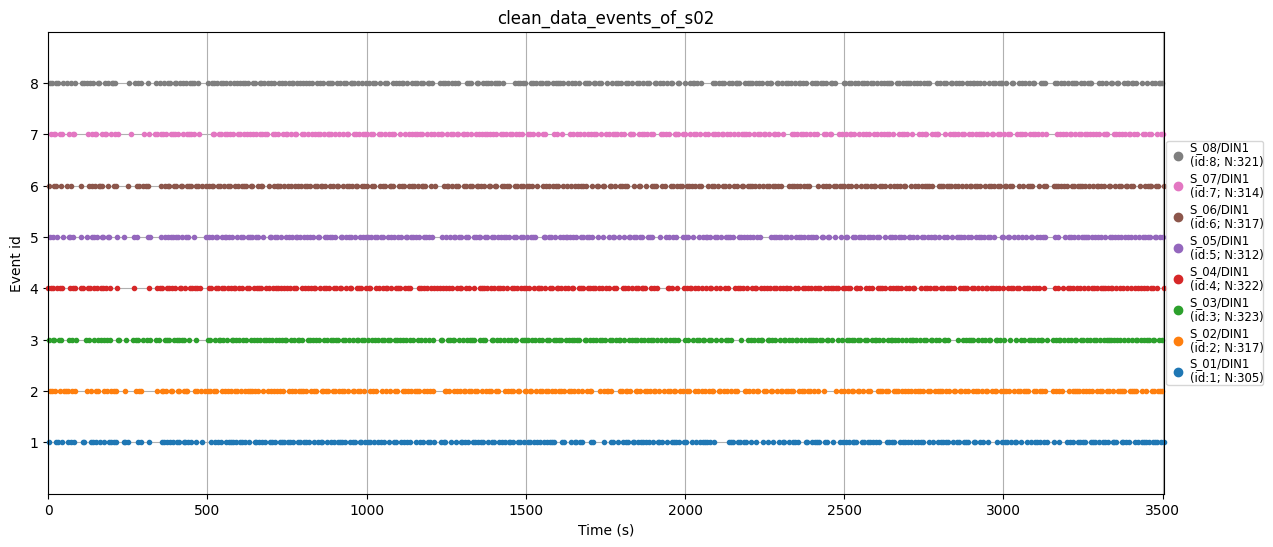

In [7]:
# PLOTTING CONTINUOUS AND EPOCHED SIGNALS, AND EVENTS
# CLEAN DATA
duration = 50
channels_num = 20
epochs_num = 30

channels = [f"E{i+1:03}" for i in range(channels_num)]
eeg.plot_signals(
    raw_subject=clean_mne_subject,
    title=f"Clean signals of {c_fname}",
    channels=channels,
    duration=duration,
    output_path=config.OUTPUT_DIR,
)

eeg.plot_epochs(
    clean_epochs_subject,
    title=f"Clean epoched signals of {c_fname}",
    channels=channels,
    n_epochs=epochs_num,
    output_path=config.OUTPUT_DIR,
)

eeg.plot_events(
    clean_mne_subject, title=f"Clean data events of {c_fname}", output_path=config.OUTPUT_DIR
)


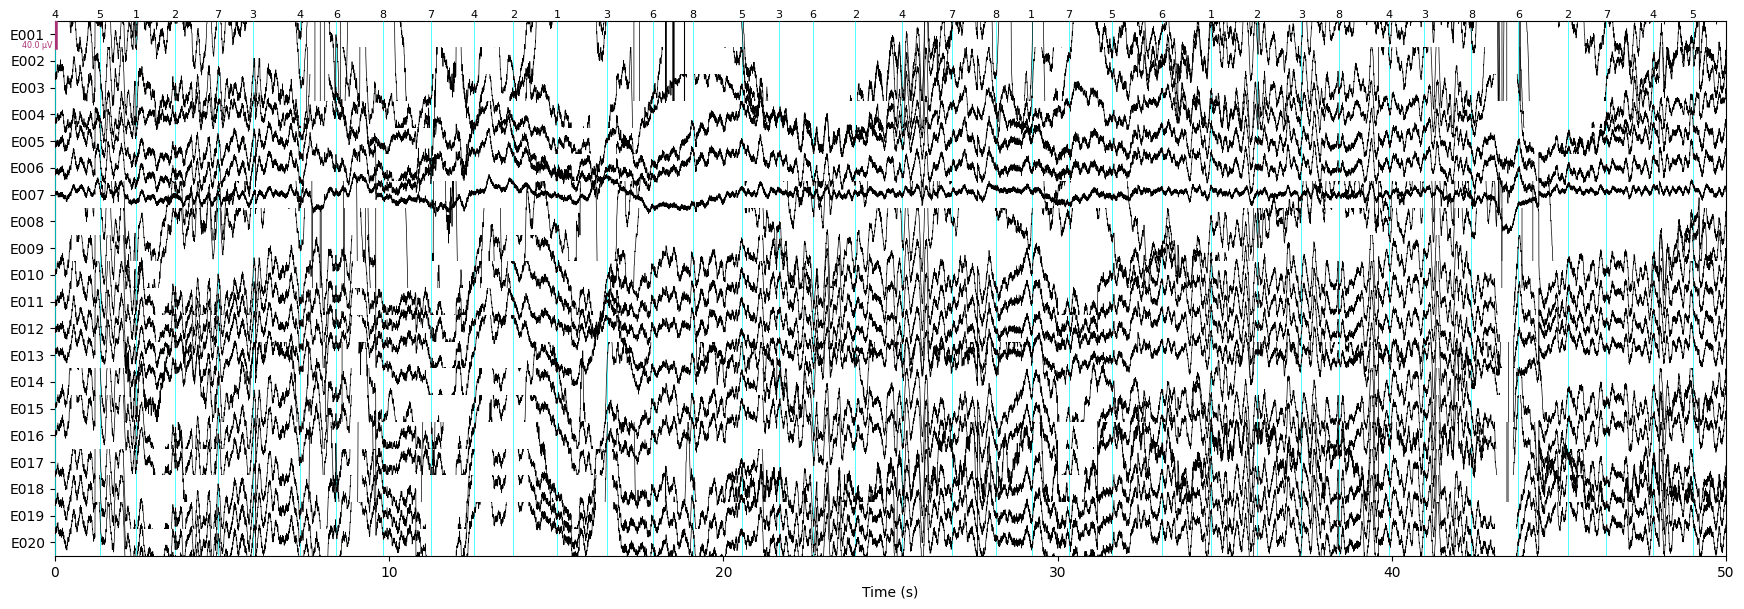

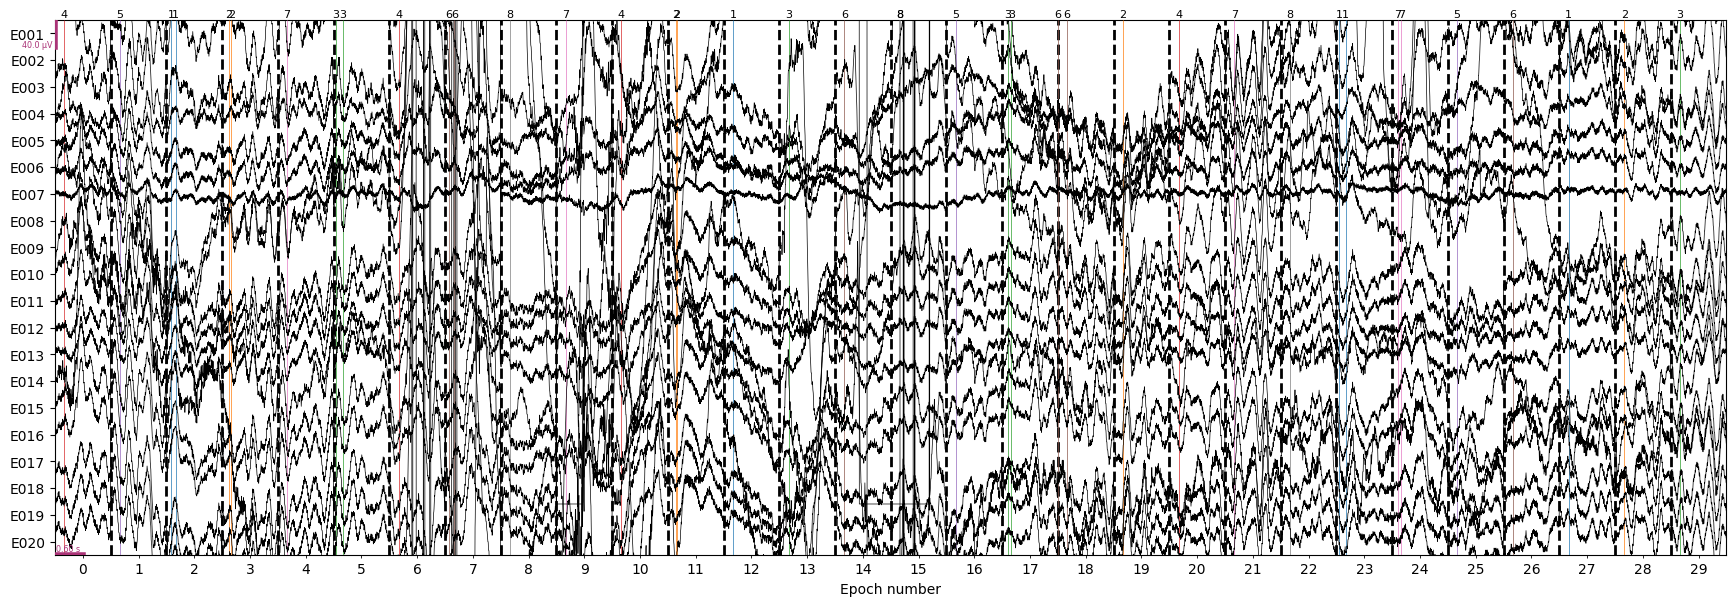

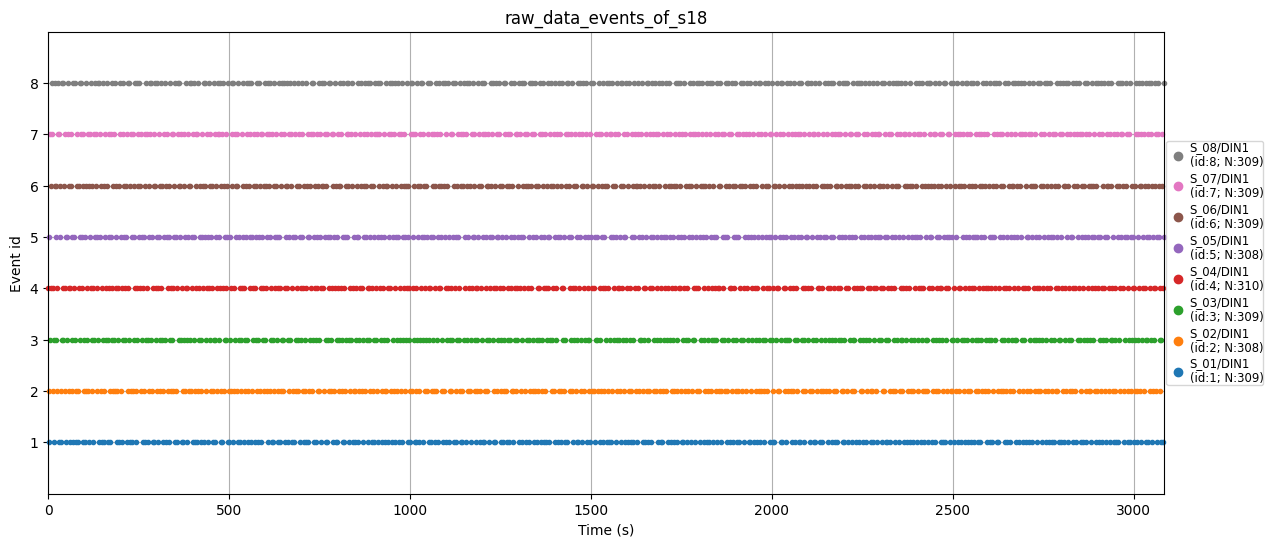

In [8]:
# RAW DATA

eeg.plot_signals(
    raw_subject=raw_mne_subject,
    title=f"Raw signals of {r_fname}",
    channels=channels,
    duration=duration,
    output_path=OUTPUT_PATH
)

eeg.plot_epochs(
    raw_epochs_subject,
    title=f"Raw epoched signals of {r_fname}",
    channels=channels,
    n_epochs=epochs_num,
    output_path=OUTPUT_PATH
)

eeg.plot_events(
    raw_mne_subject, title=f"Raw data events of {r_fname}", output_path=OUTPUT_PATH
)

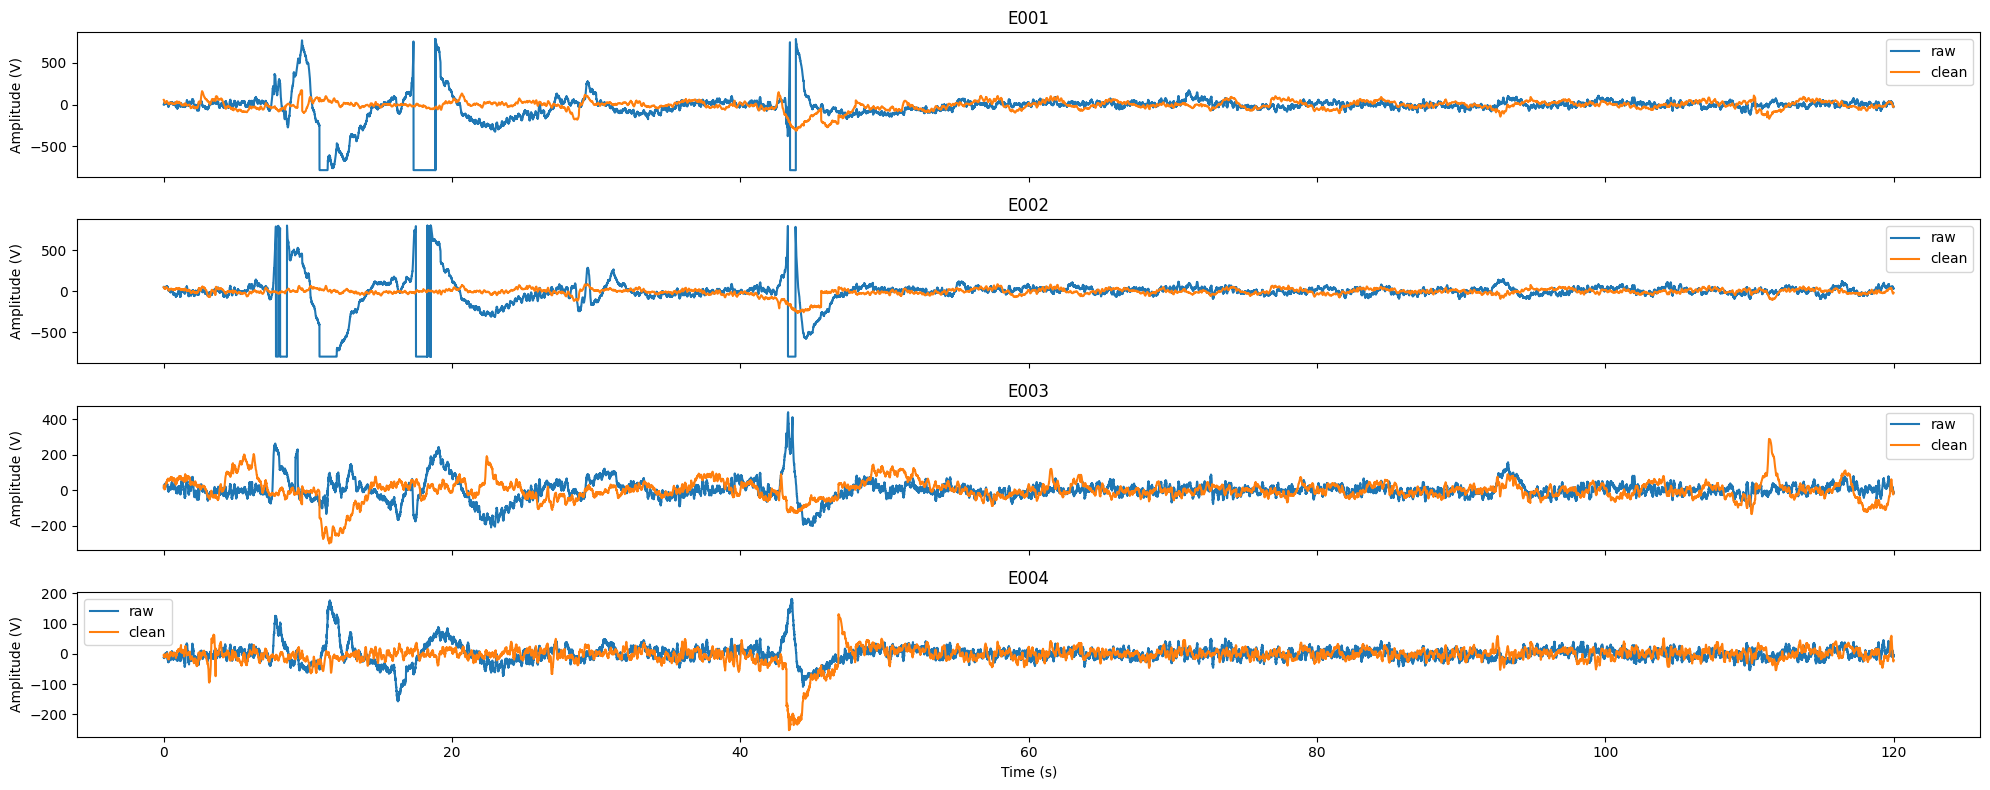

In [16]:
# COMPARING ONE RAW AND CLEAN SIGNAL CHANNEL
signal_raw = raw_subject["data"].copy()
signal_raw = signal_raw.transpose((1, 2, 0)).reshape(
    config.N_CHANNELS, -1, order="F"
)

signal_clean = clean_subject["data"].copy()
signal_clean = signal_clean.transpose((1, 2, 0)).reshape(
    config.N_CHANNELS, -1, order="F"
)

limit = 30000
start = 0
end = 4
n_channels = end - start

save = True
fig, axes = plt.subplots(n_channels, 1, figsize=(
    20, 2 * n_channels), sharex=True)
times = np.arange(limit) / config.S_FREQ
for i, channel in enumerate(range(start, end)):
    title = f"E{channel + 1:03}"
    ax = axes[i]
    ax.plot(times, signal_raw[channel][:limit], label="raw")
    ax.plot(times, signal_clean[channel][:limit], label="clean")
    ax.set_title(title)
    ax.set_ylabel('Amplitude (V)')
    # ax.set_ylim([-80, 80])
    ax.legend(loc="best")
plt.xlabel('Time (s)')
plt.tight_layout()
if save:
    output_path = config.OUTPUT_DIR / "visualization/"
    output_path.mkdir(exist_ok=True, parents=True)
    plt.savefig(
            output_path / f"clean_vs_raw_signals_comparison_of_({c_fname}).png", dpi=300, bbox_inches="tight"
        )
plt.show(block=False)
plt.pause(0.1)
plt.close()

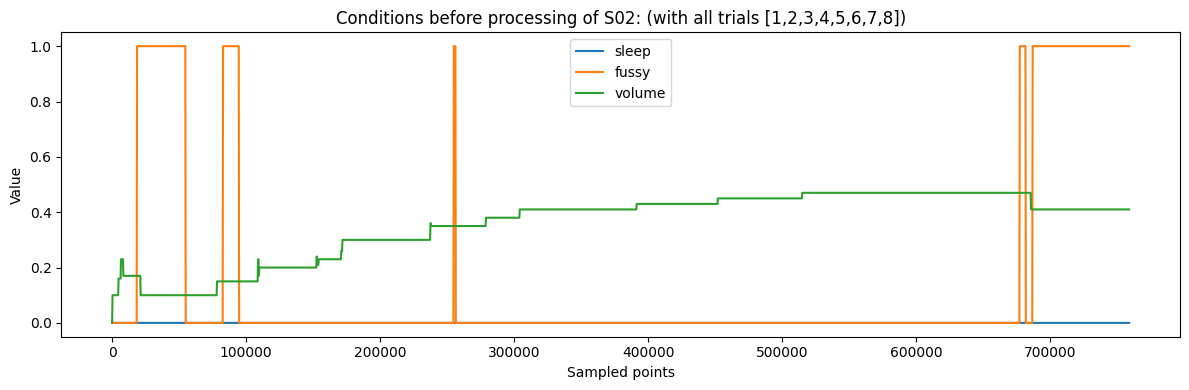

In [52]:
# PLOT ONSETS, TRIALS, VOLUME, FUSSY AND SLEEP ATTRIBUTES
title = f"Conditions of {c_fname} before processing: (with all trials [1,2,3,4,5,6,7,8])"
plot_conditions(clean_subject, title, OUTPUT_PATH)


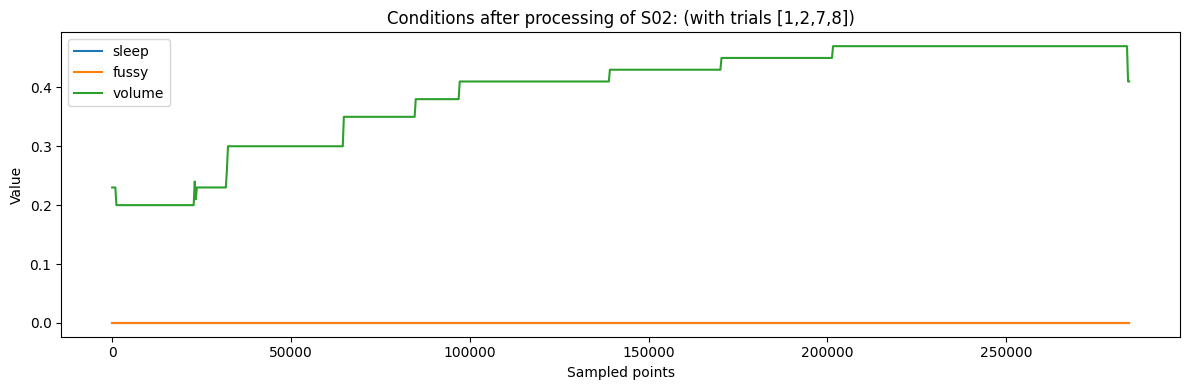

In [53]:
include = [1, 2, 7, 8]
clean_subject1 = eeg.drop_trials(
    subject=clean_subject.copy(),
    drop_trials=True,
    include=include,
    drop_volume=True,
    drop_fussy=True,
)
title = f"Conditions of {c_fname} after processing: (with trials [1,2,7,8])"
plot_conditions(clean_subject1, title, OUTPUT_PATH)


PosixPath('/home/elbramos/Desktop/IAAA/S2/TER/ter_project/output')

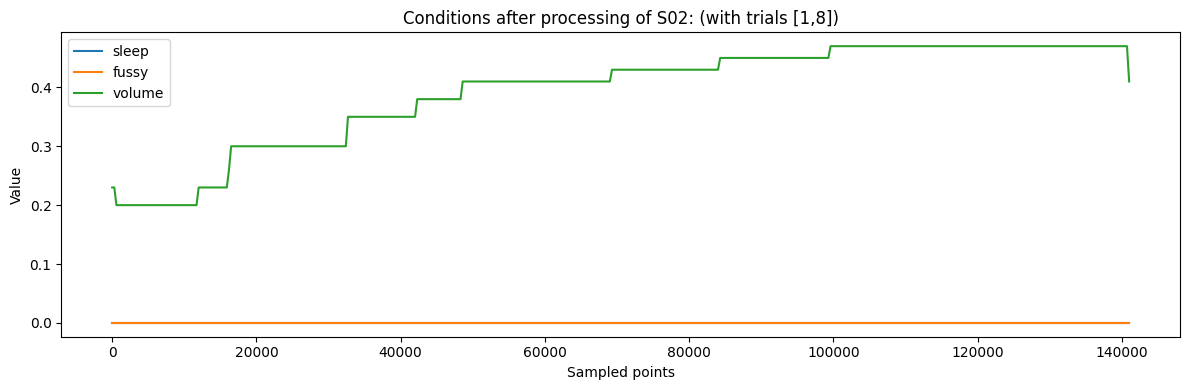

In [54]:
include = [1, 8]
clean_subject2 = eeg.drop_trials(
    subject=clean_subject.copy(),
    drop_trials=True,
    include=include,
    drop_volume=True,
    drop_fussy=True,
)
title = f"Conditions of {c_fname} after processing: (with trials [1,8])"
plot_conditions(clean_subject2, title, OUTPUT_PATH)


In [5]:
#  READ RAW DATA FROM (.set)
raw_set_path = Path(str(config.RAW_SUBJECTS_PATH).replace(basename, "")) / "sample_set/S18_raw_epochs.set"
raw_set_subject = eeg.get_subject(
    raw_set_path, config.TIME_POINTS, config.S_FREQ)


2025-05-31 19:43:26,415 - INFO - Subject S18_raw_epochs -> Data shape: (2471, 128, 300)
2025-05-31 19:43:26,726 - INFO - Total recording time: 2965.2 sec (49.42 min)


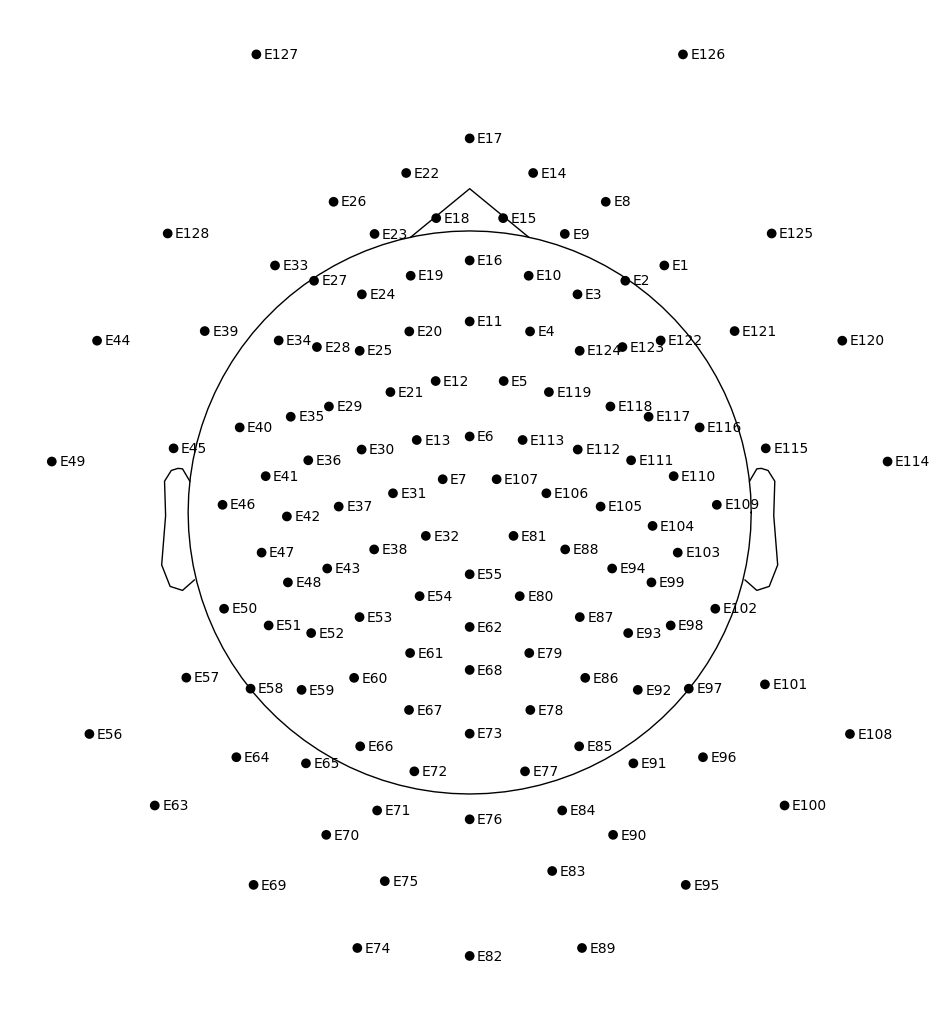

In [59]:
# VISUALIZE CHANNELS' POSITION
save = True
fig = mne.viz.plot_sensors(
    raw_set_subject.info, show_names=True, ch_type="eeg", show=False
)
fig.set_size_inches(14, 10)
plt.show(block=False)



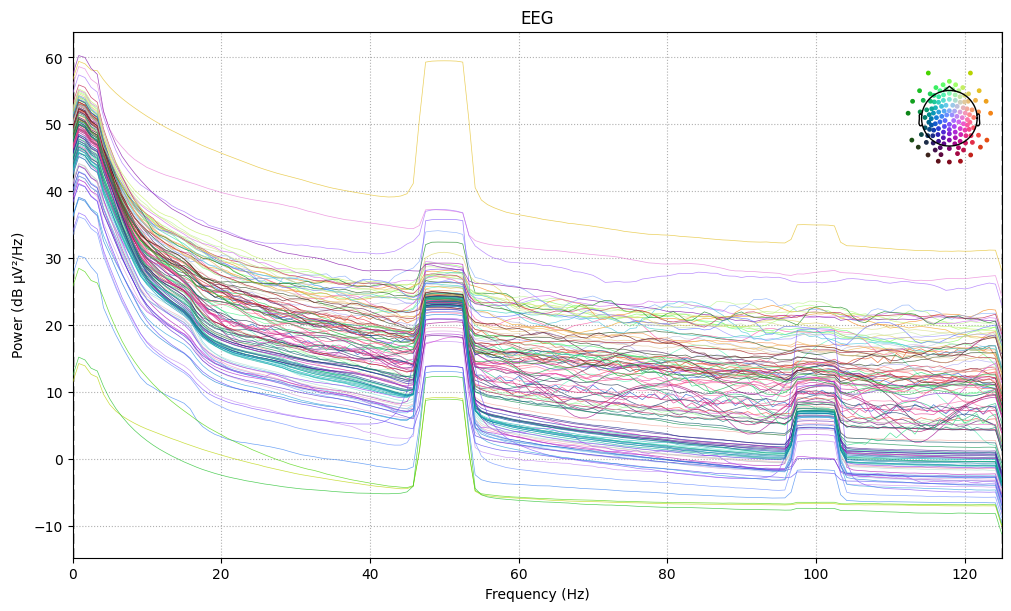

In [9]:
# VISUALIZE PSD (power or amplitude spectra)
fig = raw_set_subject.plot_psd()
fig.set_size_inches(10, 6)
if save:
    output_path = config.OUTPUT_DIR / "visualization/"
    output_path.mkdir(exist_ok=True, parents=True)
    plt.savefig(
        output_path / "PSD_amplitude_spectra_S18.png", dpi=300, bbox_inches="tight"
    )
plt.show(block=False)
plt.close()



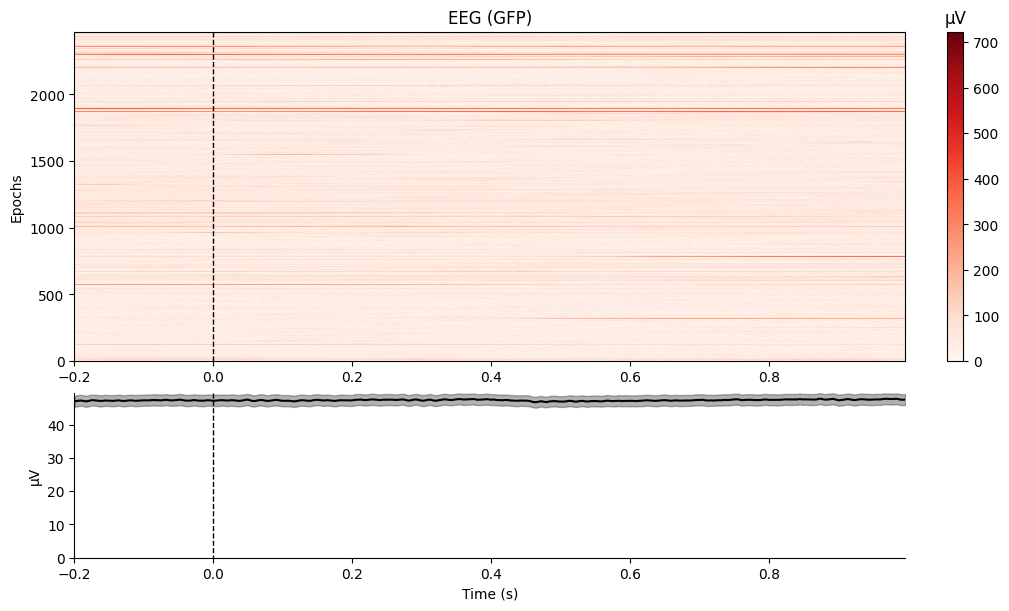

In [8]:
# VISUALIZE EVENT RELATED POTENTIAL / FIELDS IMAGE
fig = mne.viz.plot_epochs_image(raw_set_subject, show=False)
if save:
    output_path = config.OUTPUT_DIR / "visualization/"
    output_path.mkdir(exist_ok=True, parents=True)
    plt.savefig(
        output_path / "events_related_potential_image_S18.png",
        dpi=300,
        bbox_inches="tight",
    )
fig[0].set_size_inches(10, 6)
plt.show()
plt.close()


In [ ]:
# # experiment, reject, epoch, event, urevent, ref, chaninfo, urchanlocs, chanlocs, srate, pnts, trials, nbchan, filename, xmin, xmax, times
# # fig  = raw_set.plot_sensors(show_names=True, ch_type='eeg',show=False)
# fig = mne.viz.plot_sensors(raw_set.info, show_names=True, ch_type='eeg',show=False)
# fig.set_size_inches(14,10)
